In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [5]:
df.columns.values

array(['10k', 'name', 'division', '25k', 'gender', 'age', 'official',
       'bib', 'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state',
       '30k', '5k', 'half', '20k', 'country', 'city', '40k'], dtype=object)

In [6]:
df.isna().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [7]:
# Data Cleaning

# Drop ctz and state column
df = df.drop(['ctz', 'state'], 1)

# Drop row in city where there's a null value
df = df.dropna(subset=['city'])

# Replace values that represent null
df = df.replace('-', np.nan)

# Convert types to numeric
df[['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k']] = df[['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k']].apply(pd.to_numeric)

# Impute null with means
df = df.fillna(df.mean())

In [8]:
df.isnull().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

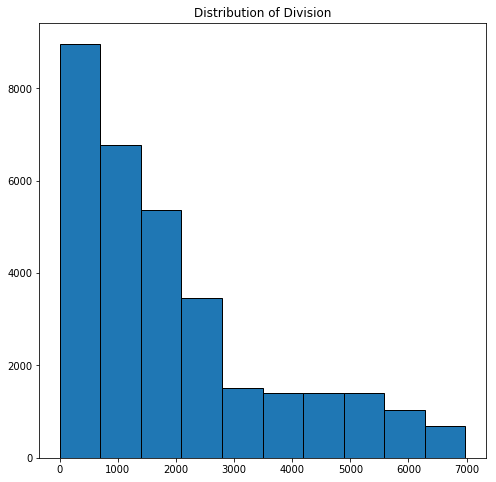

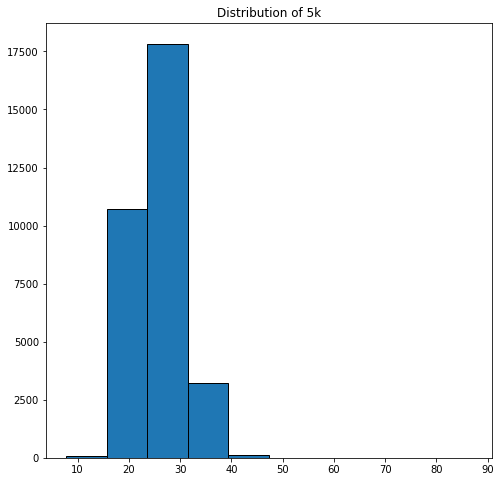

In [9]:
plt.figure(figsize=(8,8))
plt.hist(df['division'], bins=10, edgecolor='k')
plt.title('Distribution of Division')
plt.show

plt.figure(figsize=(8,8))
plt.hist(df['5k'], bins=10, edgecolor='k')
plt.title('Distribution of 5k')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

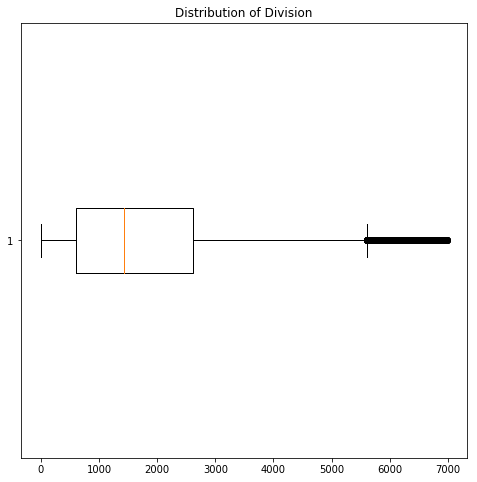

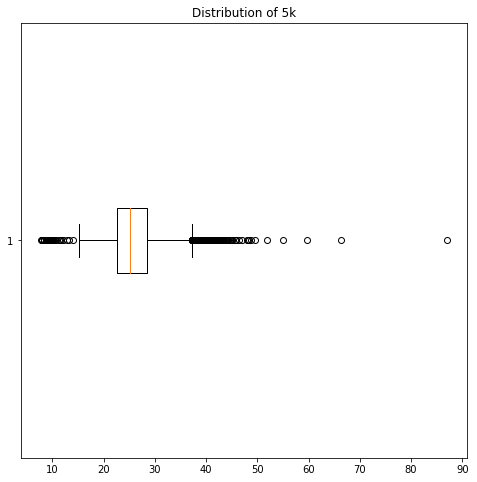

In [10]:
plt.figure(figsize=(8,8))
plt.boxplot(df['division'], vert=False)
plt.title('Distribution of Division')
plt.show

plt.figure(figsize=(8,8))
plt.boxplot(df['5k'], vert=False)
plt.title('Distribution of 5k')
plt.show

In [11]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [12]:
df[['gender', '40k']].groupby(['gender']).mean()

,40k
gender,
F,240.576334
M,219.563523


In [13]:
df[['country', '40k']].groupby(['country']).mean().sort_values(by='40k', ascending=True).head()

,40k
country,
THA,82.0050
MAR,125.2300
ETH,132.8500
BLR,134.2000
KEN,143.0825


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31983 entries, 0 to 31983
Data columns (total 19 columns):
10k          31983 non-null float64
name         31983 non-null object
division     31983 non-null int64
25k          31983 non-null float64
gender       31983 non-null object
age          31983 non-null int64
official     31983 non-null float64
bib          31983 non-null object
genderdiv    31983 non-null int64
35k          31983 non-null float64
overall      31983 non-null int64
pace         31983 non-null float64
30k          31983 non-null float64
5k           31983 non-null float64
half         31983 non-null float64
20k          31983 non-null float64
country      31983 non-null object
city         31983 non-null object
40k          31983 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 4.9+ MB


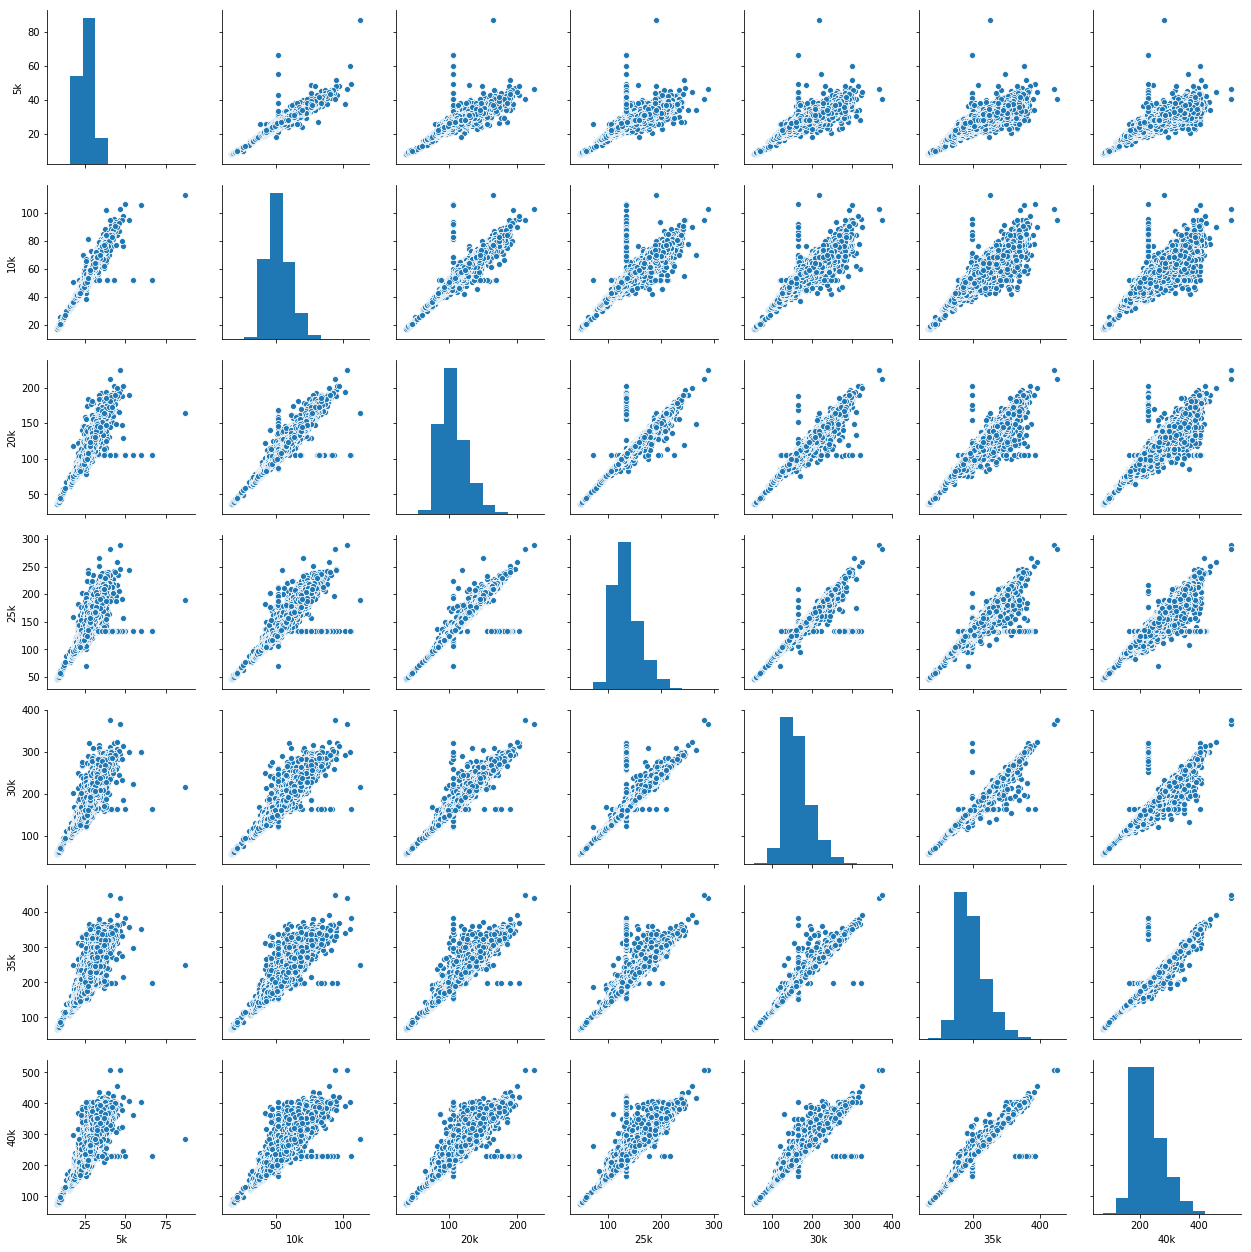

In [15]:
sns.pairplot(df[['5k', '10k', '20k', '25k', '30k', '35k', '40k']])